Importing the Dependencies


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn.datasets 
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Taking boston house price data


In [3]:
df = pd.read_csv("C:\\Users\\bhosa\\MACHINE_LEARNING\\House-Price-Prediction-Using-ML\\Boston.csv", encoding='latin1')
print(df.head())

   Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio   black  lstat  medv  
0  296     15.3  396.90   4.98  24.0  
1  242     17.8  396.90   9.14  21.6  
2  242     17.8  392.83   4.03  34.7  
3  222     18.7  394.63   2.94  33.4  
4  222     18.7  396.90   5.33  36.2  


In [4]:
Housing_price_dataframe = df.copy()
print(Housing_price_dataframe.columns)

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')


In [5]:
Housing_price_dataframe = Housing_price_dataframe.rename(columns={"medv":"price"} )
print(Housing_price_dataframe.columns)
print(Housing_price_dataframe.head())

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'price'],
      dtype='object')
   Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio   black  lstat  price  
0  296     15.3  396.90   4.98   24.0  
1  242     17.8  396.90   9.14   21.6  
2  242     17.8  392.83   4.03   34.7  
3  222     18.7  394.63   2.94   33.4  
4  222     18.7  396.90   5.33   36.2  


In [6]:
Housing_price_dataframe.shape

(506, 15)

In [7]:
Housing_price_dataframe.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
price         0
dtype: int64

In [8]:
Housing_price_dataframe.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Understanding the correlation between features in the dataset


1. Positive correlation 
2. Negative correlation

In [9]:
correlation = Housing_price_dataframe.corr()

<Axes: >

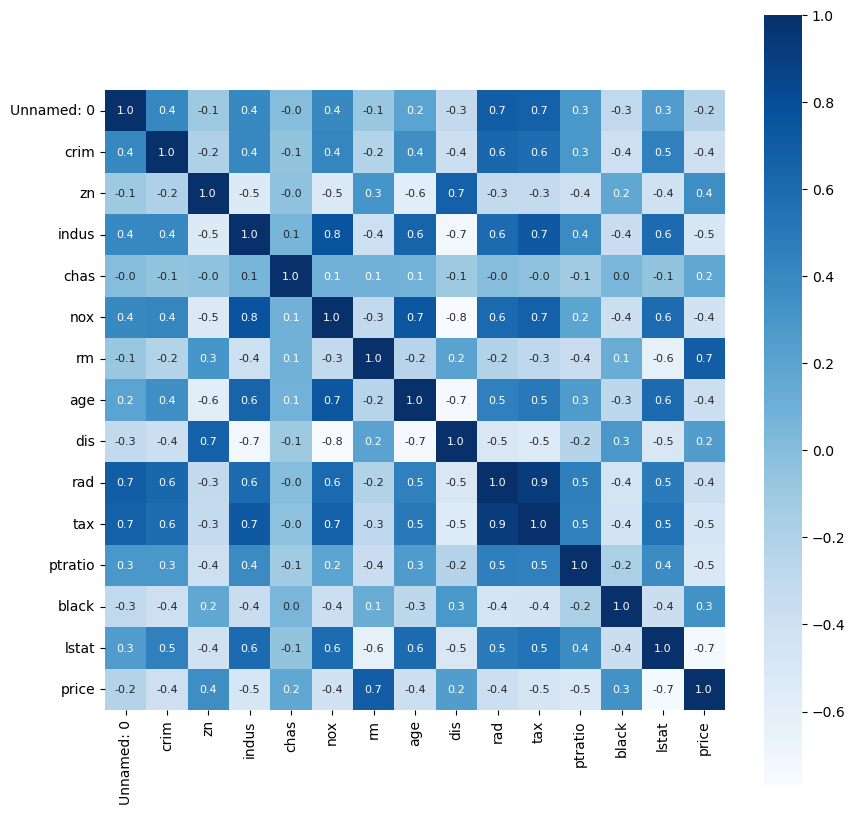

In [10]:
# Constructing heatmap to understan the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Spliting the data and Target

In [11]:
X = Housing_price_dataframe.drop(['price'], axis=1)
Y = Housing_price_dataframe['price']

In [12]:
print(X)
print(Y)

     Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0             1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1             2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2             3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3             4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4             5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         502  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502         503  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503         504  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1   
504         505  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1   
505         506  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1   

     tax  ptratio   black  lstat  
0   

Spliting the data into Traning data and Test data

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [14]:
print(X.shape, X_train.shape, X_test.shape)

(506, 14) (404, 14) (102, 14)


Model traning 

XGBoost Regressor

In [15]:
model = XGBRegressor()

In [16]:
import xgboost
print(xgboost.__version__)

3.1.2


In [17]:
model = XGBRegressor()
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [18]:
Traning_data_prediction = model.predict(X_train)
print(Traning_data_prediction)

[23.09445   20.99228   20.104528  34.69831   13.914912  13.498504
 22.000854  15.206232  10.898076  22.688675  13.796982   5.5959272
 29.802038  49.994926  34.892696  20.604803  23.389652  19.206667
 32.705322  19.597044  27.001009   8.393553  45.992256  21.694191
 27.081312  19.393814  19.28983   24.808271  22.62144   31.703571
 18.53784    8.701313  17.409687  23.69455   13.296358  10.484301
 12.670515  24.996946  19.696505  14.900087  24.200705  24.997162
 14.898304  16.99991   15.596548  12.707401  24.497099  15.003988
 50.000412  17.52259   21.200375  32.00222   15.606369  22.901505
 19.329111  18.692701  23.293829  37.20319   30.102093  33.101288
 20.993074  49.98552   13.401927   5.0106983 16.492916   8.401298
 28.686829  19.479248  20.587677  45.404484  39.802147  33.40655
 19.803558  33.414024  25.298645  49.994335  12.5361395 17.434805
 18.607355  22.591953  50.005043  23.799427  23.305088  23.090717
 41.715034  16.104162  31.589657  36.099537   7.0034914 20.38737
 19.988699 

In [19]:
score_1 = metrics.r2_score(Y_train, Traning_data_prediction)
print("R squared value = ", score_1)    
score_2 = metrics.mean_absolute_error(Y_train, Traning_data_prediction)
print("Mean Absolute Error = ", score_2)

R squared value =  0.9999981148690247
Mean Absolute Error =  0.00899344245986183


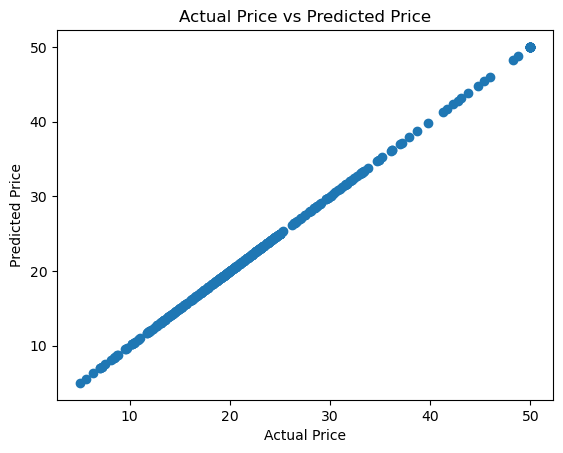

In [20]:
plt.scatter(Y_train, Traning_data_prediction)
plt.xlabel("Actual Price")  
plt.ylabel("Predicted Price")  
plt.title("Actual Price vs Predicted Price")
plt.show()

In [21]:
Text_data_prediction = model.predict(X_test)
score_1 = metrics.r2_score(Y_test, Text_data_prediction)
print("R squared value = ", score_1)    
score_2 = metrics.mean_absolute_error(Y_test, Text_data_prediction)
print("Mean Absolute Error = ", score_2)

R squared value =  0.9126650746118214
Mean Absolute Error =  2.0080178139256493
